# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lumina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.getenv('news_api'))
print(newsapi)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

6369

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2777

In [6]:
# Create function to get sentiment scores
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

Compound  Negative  Neutral  Positive  \
0     0.3612     0.000    0.923     0.077   
1    -0.4019     0.078    0.922     0.000   
2     0.5267     0.000    0.888     0.112   
3     0.5859     0.000    0.858     0.142   
4    -0.3716     0.074    0.926     0.000   
5     0.0000     0.000    1.000     0.000   
6     0.0000     0.000    1.000     0.000   
7    -0.3818     0.077    0.923     0.000   
8     0.0000     0.000    1.000     0.000   
9     0.0000     0.000    1.000     0.000   
10    0.4588     0.062    0.791     0.147   
11    0.0000     0.000    1.000     0.000   
12    0.2500     0.074    0.797     0.129   
13    0.0000     0.000    1.000     0.000   
14    0.7906     0.000    0.789     0.211   
15   -0.0418     0.086    0.835     0.079   
16    0.3444     0.111    0.740     0.149   
17    0.4019     0.000    0.883     0.117   
18    0.4019     0.000    0.883     0.117   
19    0.4404     0.000    0.891     0.109   

                                              content  
0   Musk.MARK RALSTON/AFP via Getty Images\r\nElon...  
1   Image source, AFP via Getty Images\r\nImage ca...  
2   People aren't done hijacking major politicians...  
3   Dec 23 (Reuters) - The U.S. Securities and Exc...  
4   Between Bitcoin-themed superspreader events an...  
5   Representation of cryptocurrency bitcoin is se...  
6   A representation of the virtual cryptocurrency...  
7   LONDON, Jan 7 (Reuters) - Bitcoin on Friday sl...  
8   Posted \r\nA computer scientist who has claime...  
9   Posted \r\nA computer scientist who has claime...  
10  In a disclosure that should surprise no one, t...  
11  In the spring of 2021, the encrypted communica...  
12  "Bitcoin mining is a process of competitively ...  
13  Bitcoin slumped Wednesday and into Thursday.Ji...  
14  MEXICO CITY, Dec 17 (Reuters) - Mexico's Grupo...  
15  The Fine Print: The following comments are own...  
16  A decade ago, cryptocurrencies were considered...  
17  Bitcoin's most notable feature is its decentra...  
18  SAN SALVADOR, Jan 4 (Reuters) - El Salvador's ...  
19  LONDON, Jan 5 (Reuters) - Bitcoin will take ma...

In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1    -0.1531     0.060    0.940     0.000   
2     0.4939     0.000    0.881     0.119   
3     0.3612     0.000    0.930     0.070   
4     0.0000     0.000    1.000     0.000   
5     0.0000     0.000    1.000     0.000   
6     0.0000     0.000    1.000     0.000   
7     0.0000     0.000    1.000     0.000   
8     0.0000     0.000    1.000     0.000   
9     0.0000     0.000    1.000     0.000   
10    0.7620     0.000    0.775     0.225   
11    0.0000     0.000    1.000     0.000   
12    0.5267     0.000    0.868     0.132   
13    0.2023     0.000    0.920     0.080   
14    0.6908     0.000    0.831     0.169   
15    0.7717     0.000    0.796     0.204   
16    0.9052     0.000    0.751     0.249   
17   -0.4340     0.102    0.898     0.000   
18    0.9460     0.000    0.640     0.360   
19    0.3948     0.051    0.805     0.143   

                                              content  
0   White Castle double cheeseburger.Erin McDowell...  
1   Crypto Street Restaurant, Clearwater Beach, Fl...  
2   Nicholas Merten , an expert in cryptography, p...  
3   While people around the world still searched f...  
4   CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...  
5   Representations of cryptocurrencies Bitcoin, E...  
6   In early December 2021, Skiff rolled out the o...  
7   In the future, luxury brands may have storefro...  
8   Representation of cryptocurrency bitcoin is se...  
9   A representation of the virtual cryptocurrency...  
10  Cryptocurrencies that are set to see the most ...  
11  The Ethereum blockchain is essentially a trans...  
12  When Ethereum first launched, it wanted to be ...  
13  Getty Images\r\nIt was a banner year for digit...  
14  NurPhoto/Getty Images\r\nPopular investing app...  
15  The digital era has welcomed the sensation of ...  
16  Your business is crucial, of course, but it pr...  
17  Enlarge/ No, see, this copy of the image isn't...  
18  Bottom line:Coinbase and Kraken both offer sta...  
19  Reddit has announced that it had submitted a f...

In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.168235   0.028100   0.902450   0.069450
std     0.337630   0.040219   0.082494   0.069828
min    -0.401900   0.000000   0.740000   0.000000
25%     0.000000   0.000000   0.852250   0.000000
50%     0.125000   0.000000   0.906500   0.078000
75%     0.411525   0.074000   1.000000   0.120000
max     0.790600   0.111000   1.000000   0.211000

In [10]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

Compound   Negative    Neutral  Positive
count  20.000000  20.000000  20.000000  20.00000
mean    0.273375   0.010650   0.901750   0.08755
std     0.392924   0.027469   0.106191   0.10820
min    -0.434000   0.000000   0.640000   0.00000
25%     0.000000   0.000000   0.824500   0.00000
50%     0.101150   0.000000   0.925000   0.03500
75%     0.567725   0.000000   1.000000   0.14950
max     0.946000   0.102000   1.000000   0.36000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lumina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words lower case
    words = word_tokenize(re_clean.lower())
    
    # Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [14]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

Compound  Negative  Neutral  Positive  \
0    0.3612     0.000    0.923     0.077   
1   -0.4019     0.078    0.922     0.000   
2    0.5267     0.000    0.888     0.112   
3    0.5859     0.000    0.858     0.142   
4   -0.3716     0.074    0.926     0.000   

                                             content  \
0  Musk.MARK RALSTON/AFP via Getty Images\r\nElon...   
1  Image source, AFP via Getty Images\r\nImage ca...   
2  People aren't done hijacking major politicians...   
3  Dec 23 (Reuters) - The U.S. Securities and Exc...   
4  Between Bitcoin-themed superspreader events an...   

                                              tokens  
0  [muskmark, ralstonafp, via, getty, imageselon,...  
1  [image, source, afp, via, getty, imagesimage, ...  
2  [people, arent, done, hijacking, major, politi...  
3  [dec, 23, reuters, u, security, exchange, comm...  
4  [bitcointhemed, superspreader, event, cringey,...

In [15]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

Compound  Negative  Neutral  Positive  \
0    0.0000      0.00    1.000     0.000   
1   -0.1531      0.06    0.940     0.000   
2    0.4939      0.00    0.881     0.119   
3    0.3612      0.00    0.930     0.070   
4    0.0000      0.00    1.000     0.000   

                                             content  \
0  White Castle double cheeseburger.Erin McDowell...   
1  Crypto Street Restaurant, Clearwater Beach, Fl...   
2  Nicholas Merten , an expert in cryptography, p...   
3  While people around the world still searched f...   
4  CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...   

                                              tokens  
0  [white, castle, double, cheeseburgererin, mcdo...  
1  [crypto, street, restaurant, clearwater, beach...  
2  [nicholas, merten, expert, cryptography, predi...  
3  [people, around, world, still, searched, infor...  
4  [cryptopunksrokas, tenysullinft, sale, breakth...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens

def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [18]:
btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [19]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [20]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 19),
 ('bitcoin', 12),
 ('reuters', 7),
 ('cryptocurrency', 5),
 ('twitter', 4),
 ('market', 4),
 ('digital', 3),
 ('70', 3),
 ('account', 3),
 ('week', 3)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 20),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('2021', 6),
 ('crypto', 4),
 ('year', 4),
 ('cryptocurrencies', 4),
 ('user', 4),
 ('asset', 4),
 ('brand', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

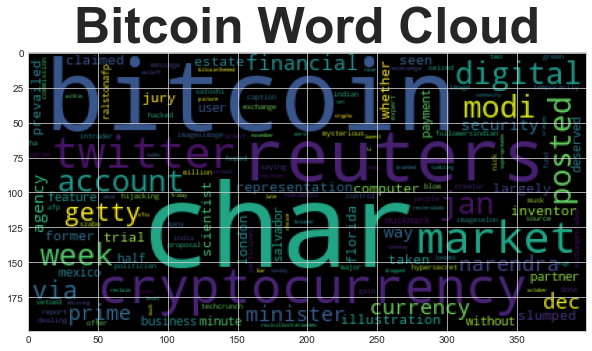

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

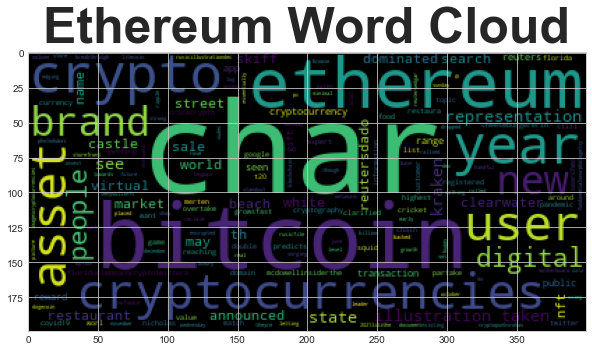

In [26]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [31]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
+1087 CARDINAL
Dec 23 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
this week DATE
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
LONDON GPE
Jan 7 DATE
Reuters ORG
Friday DATE
as much as 5% PERCENT
late September DATE
41,000 MONEY
3.7% PERCENT
this week DATE
Florida GPE
half CARDINAL
this week DATE
Florida GPE
half CARDINAL
CIA ORG
the spring of 2021 DATE
Signal ORG
UK GPE
10 minutes or so TIME
David Gerard PERSON
Wednesday DATE
Thursday DATE
Jirapong Manustrong/Getty Images PERSON
mor

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [35]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(doc, style='ent')

In [37]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

White Castle FAC
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Crypto Street Restaurant ORG
Clearwater Beach GPE
Florida.@ClwBeachCrypto/Twitter ORG
Clearwater Beach GPE
Florida GPE
Crypto Street Restaura PERSON
Nicholas Merten PERSON
May 2018 DATE
Google ORG
Search GPE
2021 DATE
Squid Game ORG
CryptoPunksRokas Tenys ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
early December 2021 DATE
Skiff ORG
MetaMask PRODUCT
Skiff ORG
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Getty Images ORG
Cryptocurrencies ORG
Wednesday DATE
50,000 MONEY
Getty Images ORG
a banner year DATE
2021 DATE
the new year DATE
Crypto PERSON
2021 DATE
NurPhoto/Getty Images ORG
Robinhood O

---